In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # dataframes
import matplotlib.pyplot as plt # General visualisations
import matplotlib.ticker as mtick # Axis visuals
import seaborn as sns # Statistical visualisations
from math import pi # Radar chart support
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix 

In [2]:
# loading the 1st dataset
df1=pd.read_csv('train_values.csv')
df1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df1.head(1)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df1.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [5]:
# loading the 2nd dataset
df2=pd.read_csv('train_labels.csv')
df2

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [6]:
df2.head(1)

,building_id,damage_grade
0,802906,3


In [7]:
df2.columns

Index(['building_id', 'damage_grade'], dtype='object')

In [8]:
# Merge the two datasets using a common column as a key
df = pd.merge(df1, df2,how = 'inner', on='building_id')
# The how='inner' parameter specifies that only the rows that have matching values in both data frames should be included in the merged data frame. In other words, only the rows that have the same building_id in both data frames will be included in the merged data frame.
# save the DataFrame to a CSV file
df.to_csv('main.csv', index=False)
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [9]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [10]:
df.shape

(260601, 40)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [12]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Conclusion:
   1. damage_grades varies from 1,2 and 3. where 3 is represents the maximum damage and 75% percentage of buldings are having damage grade 3.
   2. count_floors_pre_eq: No. of floors before earthquake were, maximum 9 floors and whereas 75% of buildings are having only 2 floors.
   3. age: maximum age of building is 995 years whearas average age of building was 26.53 years
   4. area_percentage: normalized area of the building footprint is minimum 1 whereas maximum is 100.
   

In [13]:
# sum up the null values in dataframe
# there are no null values
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Conclusion: 
From above dataframe there are 8 features in object datatype and rest are integers

## Define Unique Feature

In [15]:
def feature_info(feature):
    print('Unique values in the feature:',feature.unique())
    print('No of Null values:',feature.isna().sum())

In [16]:
feature_info(df.foundation_type)

Unique values in the feature: ['r' 'w' 'i' 'u' 'h']
No of Null values: 0


In [17]:
feature_info(df.geo_level_1_id)

Unique values in the feature: [ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
No of Null values: 0


In [18]:
feature_info(df.roof_type)

Unique values in the feature: ['n' 'q' 'x']
No of Null values: 0


In [19]:
feature_info(df.count_floors_pre_eq)

Unique values in the feature: [2 3 1 4 5 6 7 8 9]
No of Null values: 0


In [20]:
feature_info(df.land_surface_condition)

Unique values in the feature: ['t' 'o' 'n']
No of Null values: 0


In [21]:
feature_info(df.foundation_type)

Unique values in the feature: ['r' 'w' 'i' 'u' 'h']
No of Null values: 0


In [22]:
feature_info(df.ground_floor_type)

Unique values in the feature: ['f' 'x' 'v' 'z' 'm']
No of Null values: 0


In [23]:
feature_info(df.other_floor_type)

Unique values in the feature: ['q' 'x' 'j' 's']
No of Null values: 0


In [24]:
feature_info(df.plan_configuration)

Unique values in the feature: ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
No of Null values: 0


In [25]:
feature_info(df.legal_ownership_status)

Unique values in the feature: ['v' 'a' 'r' 'w']
No of Null values: 0


In [26]:
feature_info(df.damage_grade)

Unique values in the feature: [3 2 1]
No of Null values: 0


In [ ]:
#df = df.drop(columns ="has_secondary_use","has_secondary_use_agriculture")
#df = df.drop(['has_secondary_use','has_secondary_use_agriculture'],axis=1)

In [27]:
df.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [28]:
df['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

## Data Pre processing

In [29]:
num_data=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
'count_floors_pre_eq','area_percentage', 'age','height_percentage','count_families']
cat_data=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration'] 
bin_data=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
         'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer,LabelEncoder
le = LabelEncoder()
# Transform the categorical data into numeric
#df = le.fit_transform(['land_surface_condition', 'foundation_type', 'roof_type',
#       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
#       'plan_configuration'])

cat_col = ['land_surface_condition', 'foundation_type', 'roof_type',
         'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration']

for cat in cat_col:
    print(cat)
    df[cat] = le.fit_transform(df[cat])


land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
legal_ownership_status
plan_configuration


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int32
 9   foundation_type                         260601 non-null  int32
 10  roof_type                               260601 non-null  int32
 11  

In [32]:
df[cat_col].head(5)

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,legal_ownership_status,plan_configuration
0,2,2,0,0,1,3,2,2
1,1,2,0,3,1,2,2,2
2,2,2,0,0,3,3,2,2
3,2,2,0,0,3,2,2,2
4,2,2,0,0,3,2,2,2


In [33]:
for cat in cat_col:
    print(cat)
    feature_info(df[cat])

land_surface_condition
Unique values in the feature: [2 1 0]
No of Null values: 0
foundation_type
Unique values in the feature: [2 4 1 3 0]
No of Null values: 0
roof_type
Unique values in the feature: [0 1 2]
No of Null values: 0
ground_floor_type
Unique values in the feature: [0 3 2 4 1]
No of Null values: 0
other_floor_type
Unique values in the feature: [1 3 0 2]
No of Null values: 0
position
Unique values in the feature: [3 2 0 1]
No of Null values: 0
legal_ownership_status
Unique values in the feature: [2 0 1 3]
No of Null values: 0
plan_configuration
Unique values in the feature: [2 9 8 7 4 1 0 5 3 6]
No of Null values: 0


In [34]:
df=df.drop(['building_id','has_secondary_use','has_secondary_use_agriculture'],axis=1)

In [35]:
df.head(2)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,0,0,0,2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   geo_level_3_id                          260601 non-null  int64
 3   count_floors_pre_eq                     260601 non-null  int64
 4   age                                     260601 non-null  int64
 5   area_percentage                         260601 non-null  int64
 6   height_percentage                       260601 non-null  int64
 7   land_surface_condition                  260601 non-null  int32
 8   foundation_type                         260601 non-null  int32
 9   roof_type                               260601 non-null  int32
 10  ground_floor_type                       260601 non-null  int32
 11  

<AxesSubplot:>

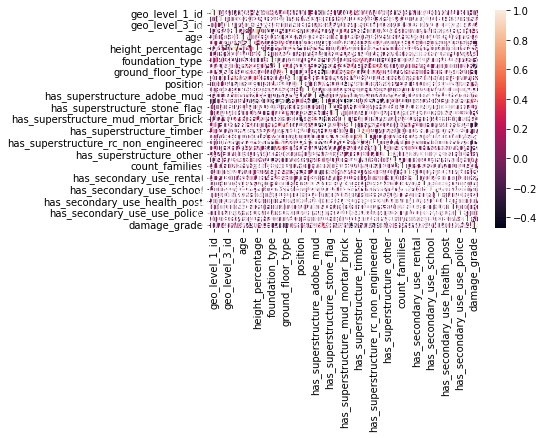

In [37]:
sns.heatmap(df.corr(), annot = True)

In [39]:
df.corr()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
geo_level_1_id,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,0.030434,0.197030,0.040651,...,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,-0.034365,-0.034404,-0.090820,...,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015610,0.007081,-0.007506,...,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.043832,-0.149130,0.091733,...,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.015866,-0.031302,-0.033532,...,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534,0.029273
area_percentage,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.027887,-0.103044,0.259252,...,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111,-0.125221
height_percentage,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.022876,-0.149241,0.165649,...,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397,0.048130
land_surface_condition,0.030434,-0.034365,-0.015610,0.043832,0.015866,0.027887,0.022876,1.000000,-0.009165,0.054031,...,0.009847,0.008792,0.003889,0.004538,0.002525,0.001176,0.000719,0.002937,-0.011874,-0.012218
foundation_type,0.197030,-0.034404,0.007081,-0.149130,-0.031302,-0.103044,-0.149241,-0.009165,1.000000,-0.074317,...,-0.069214,-0.049471,-0.021222,-0.006347,0.004415,-0.005235,-0.010164,-0.003342,-0.007687,-0.100601
roof_type,0.040651,-0.090820,-0.007506,0.091733,-0.033532,0.259252,0.165649,0.054031,-0.074317,1.000000,...,0.150329,0.129091,0.046603,0.021075,0.010722,0.010496,0.016702,0.008030,0.002448,-0.173890


In [40]:
from sklearn.model_selection import train_test_split
X = df.drop('damage_grade', axis=1)
y = df['damage_grade']

In [43]:
X.shape, y.shape

((260601, 36), (260601,))

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[0.2       , 0.3412754 , 0.97063738, ..., 0.        , 0.        ,
        0.        ],
       [0.26666667, 0.63069376, 0.22376064, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.25437982, 0.71401289, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.56666667, 0.03573931, 0.64955837, ..., 0.        , 0.        ,
        0.        ],
       [0.86666667, 0.02733006, 0.14729052, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.00630694, 0.7241983 , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
#spliting data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state = 25)

# Descision Tree

In [65]:
from sklearn import tree
from sklearn.metrics import accuracy_score
# Create a decision tree classifier with max depth of 16
clf = tree.DecisionTreeClassifier(max_depth=16)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = clf.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 70.16%
